In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.linear_model import LinearRegression

In [13]:
NCI_60data = pd.read_csv('D:/sas/NCI60_data.csv')
NCI_60labs = pd.read_csv('D:/sas/NCI60_labs.csv')
NCI_60data.info()
NCI_60data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 6831 entries, Unnamed: 0 to 6830
dtypes: float64(6830), object(1)
memory usage: 3.3+ MB


Unnamed: 0    0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
19            0
20            0
21            0
22            0
23            0
24            0
25            0
26            0
27            0
28            0
29            0
             ..
6801          0
6802          0
6803          0
6804          0
6805          0
6806          0
6807          0
6808          0
6809          0
6810          0
6811          0
6812          0
6813          0
6814          0
6815          0
6816          0
6817          0
6818          0
6819          0
6820          0
6821          0
6822          0
6823          0
6824          0
6825          0
6826          0
6827          0
6828          0
6829          0
6830          0
Length: 6831, dtype: int

We will first do a PCA analysis. Scale, perform PCA, and plot the variance explained and the cumulative variance explained by the PCs. How many PCs are produced in the analysis? Approximately how many PCs are required to explain 90% of the variance in the data?

In [16]:
dfnew = NCI_60data.drop(NCI_60data.columns[0], axis=1)
X = dfnew
# standardize the data 
std = StandardScaler()
X_scale=std.fit_transform(X)

In [34]:
pca=PCA()
pca.fit(X_scale) 
X_pca = pca.fit_transform(X_scale)
print(pca.explained_variance_ratio_)  
X_pca

[1.13589419e-01 6.75620253e-02 5.75184223e-02 4.24755448e-02
 3.73497235e-02 3.61863019e-02 3.06622240e-02 2.68590309e-02
 2.52949807e-02 2.37586884e-02 2.35655815e-02 2.16412198e-02
 2.04909747e-02 1.97881793e-02 1.91541737e-02 1.77176082e-02
 1.66272971e-02 1.61075898e-02 1.59433320e-02 1.55991861e-02
 1.50721674e-02 1.48009892e-02 1.43576234e-02 1.36277104e-02
 1.32350200e-02 1.27519917e-02 1.25903703e-02 1.20979413e-02
 1.18098781e-02 1.12098170e-02 1.08277440e-02 1.04477523e-02
 1.02647051e-02 9.88274535e-03 9.74257138e-03 9.31114503e-03
 9.14795316e-03 8.95640894e-03 8.72950586e-03 8.42575751e-03
 8.13979814e-03 7.89749805e-03 7.39000998e-03 7.20101586e-03
 7.08918353e-03 6.90272334e-03 6.78495251e-03 6.47012955e-03
 6.40883777e-03 6.01193511e-03 5.66418607e-03 5.63402788e-03
 5.38935217e-03 5.12786334e-03 5.11796180e-03 4.81620125e-03
 4.38498746e-03 4.10056057e-03 3.69138981e-03 3.21224918e-03
 2.55289125e-03 2.43978225e-03 2.39116326e-03 2.24015629e-32]


array([[-1.98380417e+01, -3.55563601e+00, -9.81239940e+00, ...,
         3.92266143e-01, -8.94903994e-01,  1.23694250e-14],
       [-2.30892149e+01, -6.44145978e+00, -1.34782512e+01, ...,
        -7.76330257e-01,  9.69009169e-01,  1.23694250e-14],
       [-2.74561144e+01, -2.46514326e+00, -3.53305434e+00, ...,
         4.98404578e-01, -8.44417986e-01,  1.23694250e-14],
       ...,
       [-2.29669875e+01,  3.61020384e+01,  1.81165786e+01, ...,
        -3.37372043e-01, -2.68801414e-01,  1.23694250e-14],
       [-1.91760072e+01,  5.03984409e+01,  4.21115253e+00, ...,
        -1.51507990e+00,  1.01150699e+00,  1.23694250e-14],
       [-1.32328698e+01,  3.51252492e+01,  3.43355443e+00, ...,
         5.92331292e-01, -6.70834261e-01,  1.23694250e-14]])

In [35]:
len(pca.explained_variance_ratio_)

64

Text(0,0.5,'Cummulative Explained Variance')

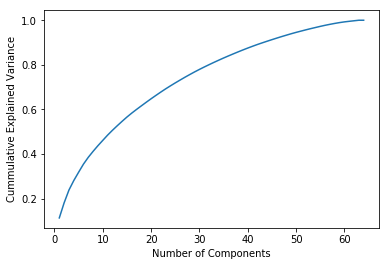

In [36]:
components = np.arange(1,65)
plt.plot(components,np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cummulative Explained Variance')

In [43]:
print(len(pca.explained_variance_ratio_>= 0.9))
pca = PCA(n_components=0.9)
pca.fit(X_scale)
print(pca.explained_variance_ratio_)
print (pca.explained_variance_)
print (pca.n_components_)

44
[0.11358942 0.06756203 0.05751842 0.04247554 0.03734972 0.0361863
 0.03066222 0.02685903 0.02529498 0.02375869 0.02356558 0.02164122
 0.02049097 0.01978818 0.01915417 0.01771761 0.0166273  0.01610759
 0.01594333 0.01559919 0.01507217 0.01480099 0.01435762 0.01362771
 0.01323502 0.01275199 0.01259037 0.01209794 0.01180988 0.01120982
 0.01082774 0.01044775 0.01026471 0.00988275 0.00974257 0.00931115
 0.00914795 0.00895641 0.00872951 0.00842576 0.0081398  0.0078975
 0.00739001 0.00720102]
[788.13026426 468.77321436 399.08655196 294.71285936 259.1477961
 251.07549678 212.74716418 186.35904085 175.50701512 164.84758546
 163.50773002 150.15571398 142.17483918 137.2985543  132.89956203
 122.9320777  115.36704961 111.76110551 110.62141689 108.23359084
 104.57691772 102.69537114  99.61911661  94.55467901  91.83003052
  88.47858102  87.35718525  83.94050942  81.94180801  77.77833649
  75.12735629  72.49081739  71.22076025  68.57056586  67.59798101
  64.60456693  63.47227435  62.14326154  60.5

Plot the scores on the first versus second PC and the scores on the first versus third PC. Color the scores by cancer type. Interpret your results.

Text(0,0.5,'PC 2')

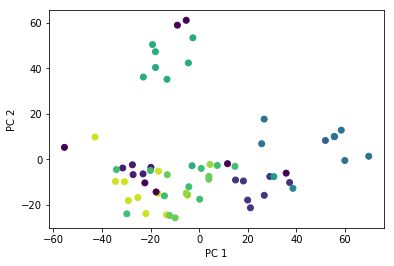

In [55]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
pca_scores = pca.fit_transform(X_scale)
pd.DataFrame(pca_scores)
plt.scatter(pca_scores[:,0],pca_scores[:,1],c = LE.fit_transform(NCI_60labs['x']))
plt.xlabel('PC 1')
plt.ylabel('PC 2')

Text(0,0.5,'PC 3')

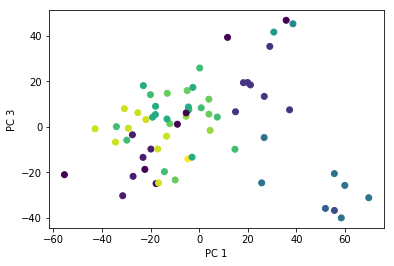

In [56]:
plt.scatter(pca_scores[:,0],pca_scores[:,2],c = LE.fit_transform(NCI_60labs['x']))
plt.xlabel('PC 1')
plt.ylabel('PC 3')

Next we will perform clustering on the data. Visualize the dendogram for hierarchical clustering with complete, average, and single linkage. Label the dendogram with the cancer types. Does the choice of linkage impact the results?

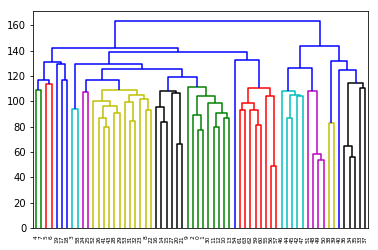

In [58]:
import scipy.cluster.hierarchy as shc
dend = shc.dendrogram(shc.linkage(X_scale, method ='complete'))

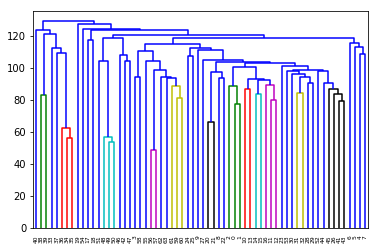

In [59]:
dend = shc.dendrogram(shc.linkage(X_scale, method ='average'))

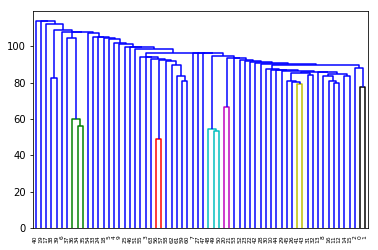

In [60]:
dend = shc.dendrogram(shc.linkage(X_scale, method ='single'))

Use complete linkage for the remainder of the analysis.  Cluster the observations into 4 groups.  Look at the labels for each of the groups and comment on the success of the clustering.  

In [61]:
kmeans = KMeans(n_clusters = 4,n_jobs = 4, max_iter = 500)
kmeans.fit(X_scale)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=4, n_init=10, n_jobs=4, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [62]:
y_kmeans = kmeans.predict(X_scale)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [63]:
df = pd.DataFrame({'KMeans_clustering labels':y_kmeans,'Original label':NCI_60labs['x']})
clusterresult = pd.crosstab(df['KMeans_clustering labels'],df['Original label'])
print(clusterresult)

Original label            BREAST  CNS  COLON  K562A-repro  K562B-repro  \
KMeans_clustering labels                                                 
0                              3    5      0            0            0   
1                              2    0      0            0            0   
2                              0    0      7            1            1   
3                              2    0      0            0            0   

Original label            LEUKEMIA  MCF7A-repro  MCF7D-repro  MELANOMA  NSCLC  \
KMeans_clustering labels                                                        
0                                0            0            0         1      4   
1                                0            1            1         0      0   
2                                6            0            0         0      5   
3                                0            0            0         7      0   

Original label            OVARIAN  PROSTATE  RENAL  UNKNOWN  
KMeans

Rather than performing hierarchical clustering on the entire data matrix, we can simply perform hierarchical clustering on the first few principal component score vectors. Sometimes performing clustering on the first few principal component score vectors can give better results than performing clustering on the full data. Perform hierarchical clustering on the first 5 principal component scores and comment on the results.  

github link: https://github.com/RachSean/Lab4